In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [43]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


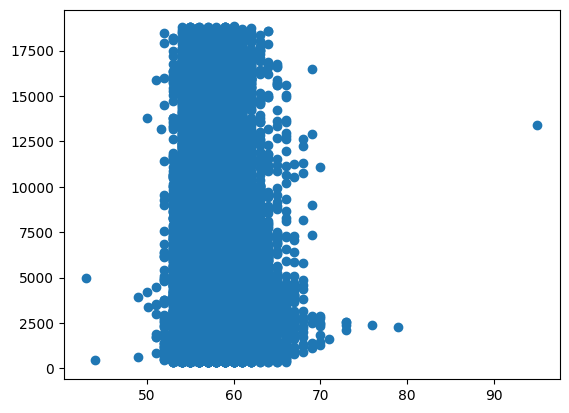

In [56]:
plt.scatter(df.table,df.price)
plt.show()

In [6]:
df['z'].mean()

3.5387337782721544

In [7]:
df['z'].nunique()

375

In [8]:
df['z'].max()

31.8

In [9]:
for col in df.columns:
    if col not in ('cut','color','clarity','Unnamed: 0'):
        print(f"{col} has correlation of {df[col].corr(df['price'])}")

carat has correlation of 0.9215913011934762
depth has correlation of -0.010647404584142976
table has correlation of 0.12713390212174203
price has correlation of 1.0
x has correlation of 0.8844351610161282
y has correlation of 0.8654208978641873
z has correlation of 0.8612494438514482


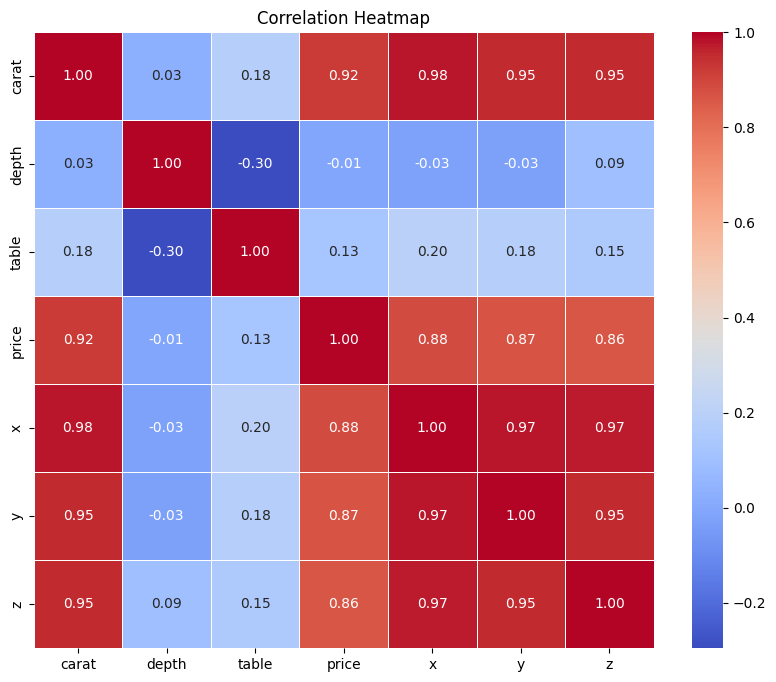

In [62]:
col = [col for col in df.columns if col not in ('cut','color','clarity','Unnamed: 0')]
ff = df[col]        

corr = ff.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
corr = pd.DataFrame({
    'column' : [col for col in df.columns if col not in ('cut','color','clarity','Unnamed: 0')],
    'correlation' : [df[col].corr(df['price']) for col in df.columns if col not in ('cut','color','clarity','Unnamed: 0')]
})

In [11]:
corr.sort_values('correlation',ascending=False)

,column,correlation
3,price,1.000000
0,carat,0.921591
4,x,0.884435
5,y,0.865421
6,z,0.861249
2,table,0.127134
1,depth,-0.010647


In [12]:
df.isnull().sum().sum()

0

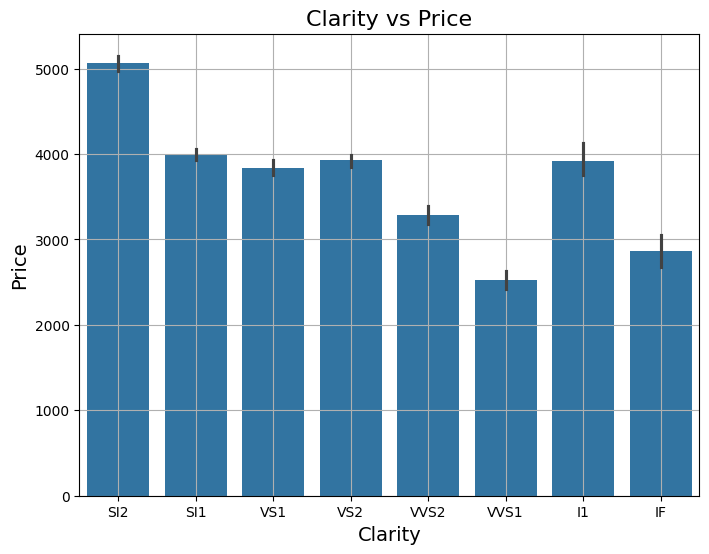

In [71]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.barplot(x = df.clarity,y = df.price)

# Adding labels and title
plt.title('Clarity vs Price', fontsize=16)
plt.xlabel('Clarity', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)

# Display the plot
plt.show()

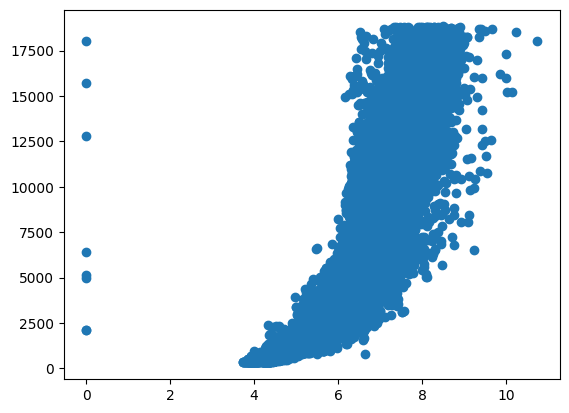

In [14]:
plt.scatter(df.x,df.price)

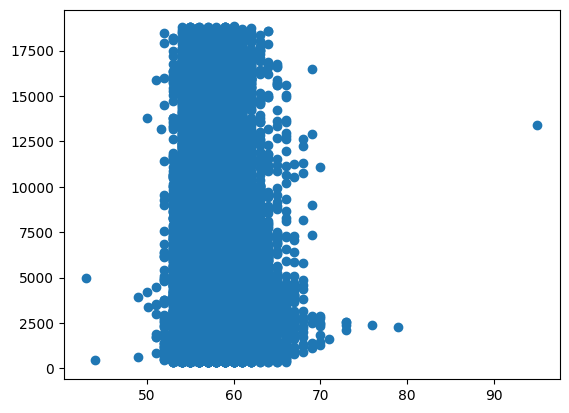

In [15]:
plt.scatter(df.table,df.price)

<Axes: xlabel='carat', ylabel='price'>

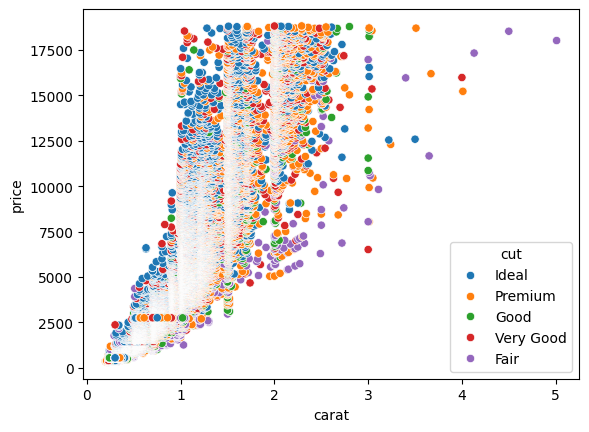

In [16]:
sns.scatterplot(x=df.carat,y=df.price,hue=df.cut)

<Axes: xlabel='cut', ylabel='price'>

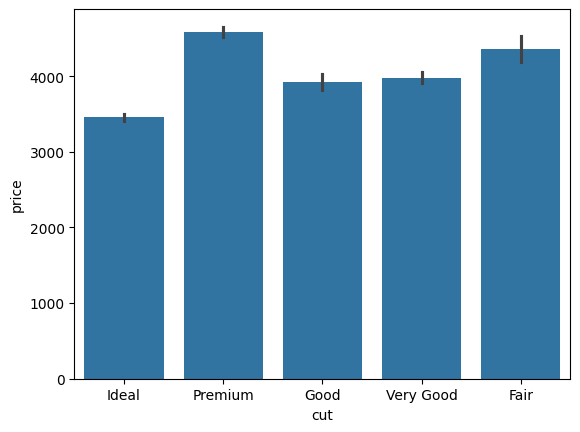

In [17]:
sns.barplot(x=df.cut,y=df.price)

In [18]:
df.color.nunique()

7

In [19]:
df.cut.nunique()

5

In [20]:
df.clarity.nunique()

8

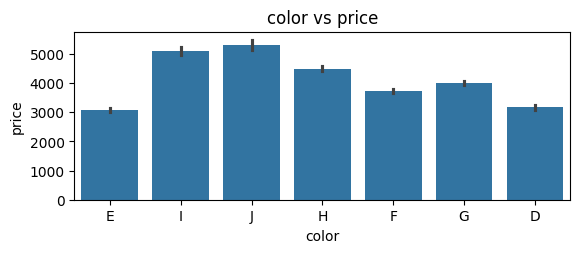

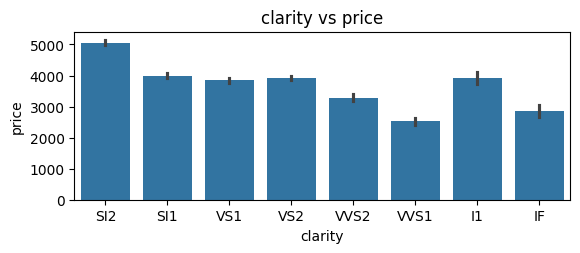

In [21]:
i = 1
for col in ('color','clarity'):
    plt.subplot(2,1,i)
    plt.title(f"{col} vs price")
    sns.barplot(x=df[col],y=df.price)
    plt.show()
    i = i+1

In [22]:
input_cols = [col for col in df.columns if col not in ('price','Unnamed: 0')]
target_col = 'price'

In [23]:
train = df[input_cols]
target = df[target_col]

In [24]:
train.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [25]:
num_cols = train.select_dtypes(include=np.number).columns.tolist()
cat_cols = train.select_dtypes(include='object').columns.tolist()

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train[num_cols])
train[num_cols] = scaler.transform(train[num_cols])

C:\Users\DELL\AppData\Local\Temp\ipykernel_3112\1827402939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[num_cols] = scaler.transform(train[num_cols])


In [27]:
train.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.006237,Ideal,E,SI2,0.513889,0.230769,0.367784,0.067572,0.076415
1,0.002079,Premium,E,SI1,0.466667,0.346154,0.362197,0.065195,0.072642
2,0.006237,Good,E,VS1,0.386111,0.423077,0.377095,0.069100,0.072642
3,0.018711,Premium,I,VS2,0.538889,0.288462,0.391061,0.071817,0.082704
4,0.022869,Good,J,SI2,0.563889,0.288462,0.404097,0.073854,0.086478


In [28]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [29]:
import category_encoders as ce

In [30]:
train.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [31]:
cut_mappping = {'Ideal' : 5, 'Premium' : 4, 'Good' : 3, 'Very Good' : 2, 'Fair' : 1}
mappings = []
mappings.append({'col':'cut','mapping':cut_mappping})

encoder = ce.OrdinalEncoder(mapping=mappings)
train = encoder.fit_transform(train)

In [32]:
train.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.006237,5,E,SI2,0.513889,0.230769,0.367784,0.067572,0.076415
1,0.002079,4,E,SI1,0.466667,0.346154,0.362197,0.065195,0.072642
2,0.006237,3,E,VS1,0.386111,0.423077,0.377095,0.069100,0.072642
3,0.018711,4,I,VS2,0.538889,0.288462,0.391061,0.071817,0.082704
4,0.022869,3,J,SI2,0.563889,0.288462,0.404097,0.073854,0.086478


In [33]:
onehot_cols = [col for col in cat_cols if col not in ('cut')]
onehot_cols

['color', 'clarity']

In [34]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(train[onehot_cols])
encoded_cols = list(encoder.get_feature_names_out(onehot_cols))
train[encoded_cols] = encoder.transform(train[onehot_cols])

In [35]:
train.drop(columns=['color','clarity'],inplace=True)

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train,target,test_size=0.3,random_state=69)

In [37]:
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error as rmse

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [39]:
model = XGBRegressor().fit(x_train,y_train)

pred = model.predict(x_train)

loss = rmse(y_train,pred)
print("loss : ",loss)

loss :  390.9252597595738


In [36]:
model_params = {
    'random_forest' : {
        'model' : RandomForestRegressor(),
        'params' : {
            'n_estimators': [50,100,150],
            'max_depth' : range(2,11,2)
        }
    }
}

In [37]:
%%time
scores = []

for model_name, model_p in model_params.items():
    clf = GridSearchCV(model_p['model'],model_p['params'],cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

scores_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

CPU times: total: 8min 48s
Wall time: 17min 47s


In [38]:
scores_df

,model,best_score,best_params
0,random_forest,0.9698,"{'max_depth': 10, 'n_estimators': 100}"


In [39]:
models = [('Random Forest', RandomForestRegressor(n_estimators=100,max_depth=10))]

for name, regressor in models:
    regressor.fit(x_train,y_train)
    print(f"for {name} model")
    print(f"training error is {rmse(y_train,regressor.predict(x_train))}")
    print(f"test error is {rmse(y_test,regressor.predict(x_test))}")

for Random Forest model
training error is 628.7046740913133
test error is 675.2306297958781


In [37]:
models = [('Linear Regression', LinearRegression()), ('KNN', KNeighborsRegressor()),
          ('Random Forest', RandomForestRegressor()), ("XGBoost", XGBRegressor()),
          ('Decision Tree', DecisionTreeRegressor())]

for name, regressor in models:
    regressor.fit(x_train,y_train)
    print(f"for {name} model")
    print(f"training error is {rmse(y_train,regressor.predict(x_train))}")
    print(f"test error is {rmse(y_test,regressor.predict(x_test))}")

for Linear Regression model
training error is 1136.6586215737718
test error is 1133.6627463533457
for KNN model
training error is 635.7635650429777
test error is 817.284747468828
for Random Forest model
training error is 207.59111778505496
test error is 558.6449062768047
for XGBoost model
training error is 390.9252597595738
test error is 562.7545023709646
for Decision Tree model
training error is 8.43717598019355
test error is 756.6582895628204


In [39]:
model = RandomForestRegressor().fit(x_train,y_train)

pred = model.predict(x_train)

loss = rmse(y_train,pred)
print("loss : ",loss)

loss :  207.5342363478226


In [40]:
test_loss = rmse(y_test,model.predict(x_test))

print("test_loss : ", test_loss)

test_loss :  559.4058092684419


In [72]:
model

RandomForestRegressor()

In [44]:
import joblib

joblib.dump(model,'diamond price prediction model 2.pkl')

['diamond price prediction model 2.pkl']